# Reference: RL Model Code

## Initialization

In [1]:
# Run dependencies
%run ./RL_model_python_lib_utils.ipynb
%run ./RL_model_python_lib_reward.ipynb
%run ./RL_model_python_lib_decision_functions.ipynb
%run ./python_lib_visualization.ipynb

## Model Fit

In [2]:
df = read_rps_data(os.path.join("data", DEFAULT_FILE))

In [3]:
# add opponent move column
separated = separate_df(df)
for e in separated:
    get_opponent_move(e)
df = pd.concat(separated)

### a) human_reward_move

In [4]:
df_a = add_col(df, ['rock_reward', 'paper_reward','scissors_reward',], value =0)
separated = separate_df(df_a)
for e in separated:
    human_reward_move(e)
df_a = pd.concat(separated)

In [5]:
soft_dist = get_softmax_probabilities(
    df_a, # df should be just human rows at this point, strip out nans etc. 
    ['rock_reward', 'paper_reward', 'scissors_reward']
)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
df_a = pick_move(df_a, soft_dist)

In [7]:
df_a=df_a[df_a['is_bot']==0]
df_a=assign_agent_outcomes(df_a)

/var/folders/tm/sjjwcmbs3250mhfs5psrzf5w0000gn/T/ipykernel_53823/3573289646.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_f_data['bin'] = pd.cut(modified_f_data.loc[:, ('round_index')], bins, labels = labs)
/var/folders/tm/sjjwcmbs3250mhfs5psrzf5w0000gn/T/ipykernel_53823/3573289646.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bot_strategy'] = data['bot_strategy'].replace([
/var/folders/tm/sjjwcmbs3250mhfs5psrzf5w0000gn/T/ipykernel_53823/3573289646.py:59: SettingWithCopyWarning:

<AxesSubplot:xlabel='Trial round', ylabel='Mean win percentage'>

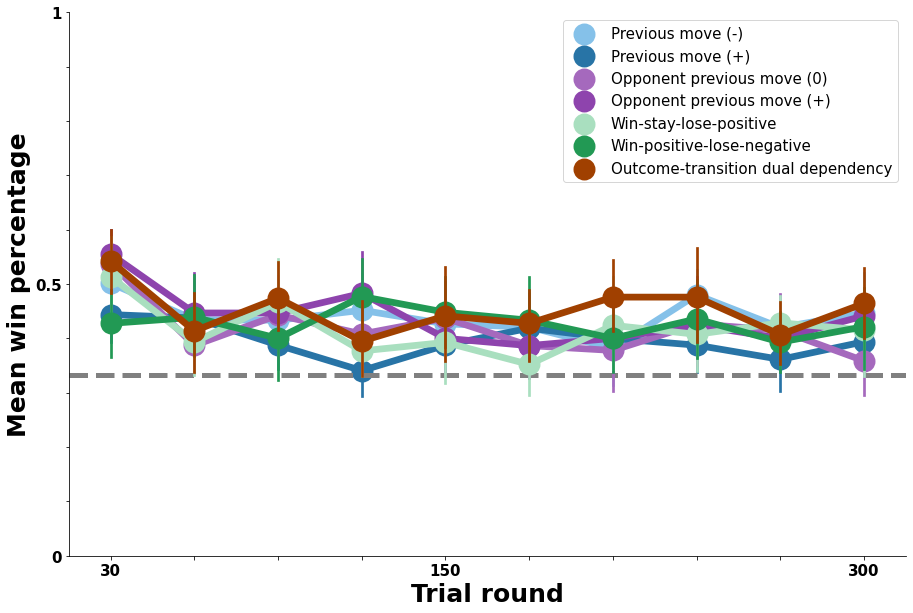

In [8]:
f_a = groupby_f_data(df_a, 'agent_outcome', bins=60)
f_a = f_a[f_a['bin']<='50']
plot_win_rates(f_a[f_a['agent_outcome']=='win'],'rl_a')
# f_a = groupby_f_data(df_a, 'agent_outcome', bins=30)
# plot_win_rates(f_a[f_a['agent_outcome']=='win'])
# plot_win_rates(win_summary(groupby_f_data(df_a,'agent_outcome',30),'agent_outcome'))

### 3b human_past_current_reward_move

In [13]:
separated = separate_df(df)
for e in separated:
    human_reward_past_cur_move(e)
df_b = pd.concat(separated)

In [14]:
separated = separate_df(df_b)
df_result_b = pd.DataFrame()
for e in separated:
    e = get_softmax_probabilities_3b(e)
    e=pick_move_3b(e)
    e['agent_outcome'] = e.apply(lambda x: evaluate_outcome(x['agent_move'], x['opponent_move']), axis=1)
    df_result_b=pd.concat([df_result_b,e],axis=0)

<ipython-input-19-f66c3ea4ee7e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_f_data['bin'] = pd.cut(modified_f_data.loc[:, ('round_index')], bins, labels = labs)
<ipython-input-19-f66c3ea4ee7e>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bot_strategy'] = data['bot_strategy'].replace([
<ipython-input-19-f66c3ea4ee7e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

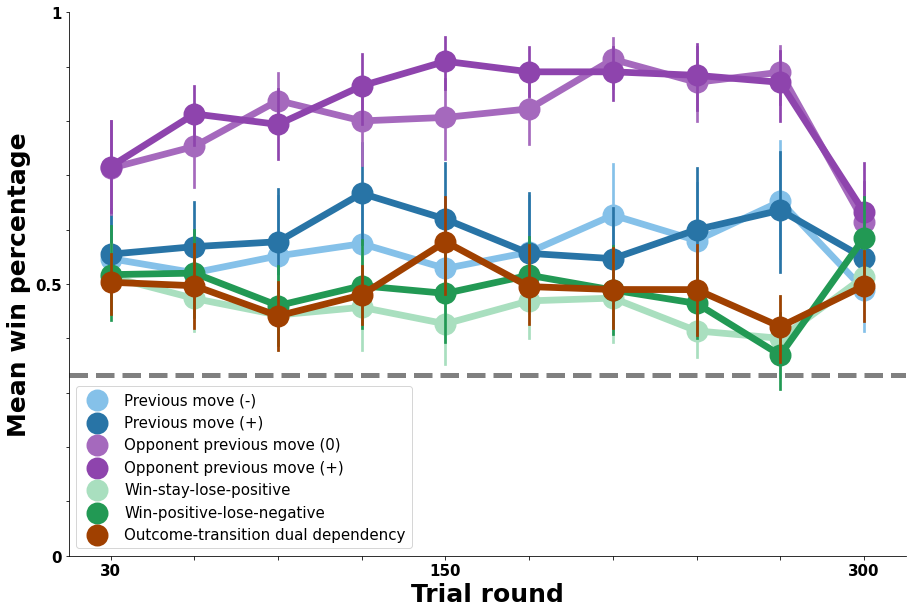

In [21]:
f_b = groupby_f_data(df_result_b, 'agent_outcome', bins=60)
f_b = f_b[f_b['bin']<='50']
plot_win_rates(f_b[f_b['agent_outcome']=='win'], 'rl_b')
# plot_win_rates(win_summary(groupby_f_data(df_result_b,'agent_outcome',30),'agent_outcome'))

### 3c opponent_past_human_current_reward_move

In [17]:
# separate df into same game id
separated = separate_df(df)
for e in separated:
    human_reward_oppo_past_cur_move(e)
df_c = pd.concat(separated)

In [18]:
separated = separate_df(df_c)
df_result_c = pd.DataFrame()
# align results from the generaed agent move and opponent move
for e in separated:
    e = get_softmax_probabilities_3c(e)
    e=pick_move_3c(e)
    e['agent_outcome'] = e.apply(lambda x: evaluate_outcome(x['agent_move'], x['opponent_move']), axis=1)
    df_result_c=pd.concat([df_result_c,e],axis=0)

<ipython-input-19-f66c3ea4ee7e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_f_data['bin'] = pd.cut(modified_f_data.loc[:, ('round_index')], bins, labels = labs)
<ipython-input-19-f66c3ea4ee7e>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bot_strategy'] = data['bot_strategy'].replace([
<ipython-input-19-f66c3ea4ee7e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

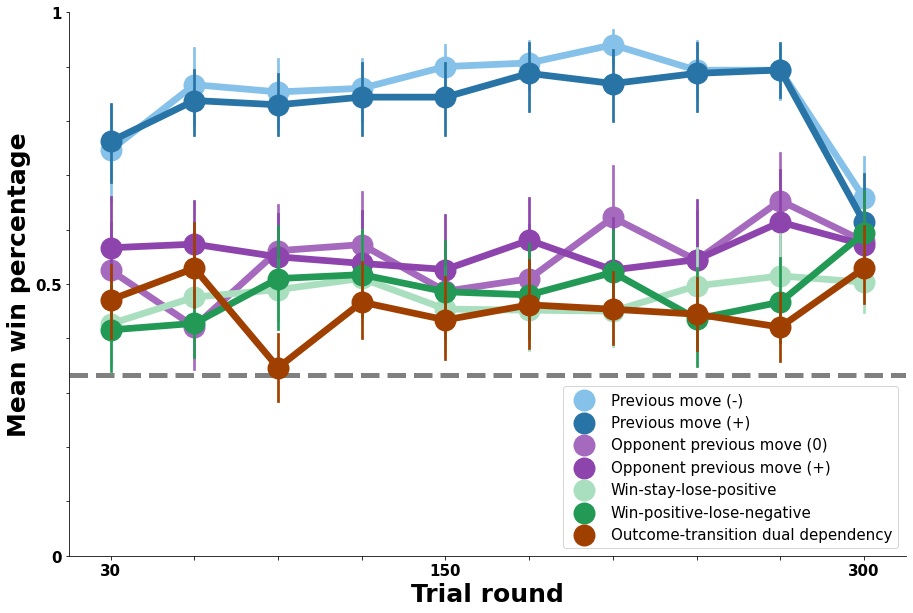

In [22]:
f_c = groupby_f_data(df_result_c, 'agent_outcome', bins=60)
f_c = f_c[f_c['bin']<='50']
plot_win_rates(f_c[f_c['agent_outcome']=='win'], 'rl_c')
# plot_win_rates(win_summary(groupby_f_data(df_result_c,'agent_outcome',30),'agent_outcome'))

### 3d) opponent_past_human_past_current_move (mix)

In [23]:
separated_agent_past = separate_df(df_b)
separated_oppo_past=separate_df(df_c)
df_result_mix = pd.DataFrame()
count=0
for i in range(len(separated_oppo_past)):
# for e_agent,e_oppo in separated_agent_past, separated_oppo_past:
    e=get_softmax_probabilities_mix(separated_agent_past[i], separated_oppo_past[i])
    e=pick_move_3d(e)
    e['agent_outcome'] = e.apply(lambda x: evaluate_outcome(x['agent_move'], x['opponent_move']), axis=1)
    df_result_mix=pd.concat([df_result_mix,e],axis=0)

<ipython-input-19-f66c3ea4ee7e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_f_data['bin'] = pd.cut(modified_f_data.loc[:, ('round_index')], bins, labels = labs)
<ipython-input-19-f66c3ea4ee7e>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bot_strategy'] = data['bot_strategy'].replace([
<ipython-input-19-f66c3ea4ee7e>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

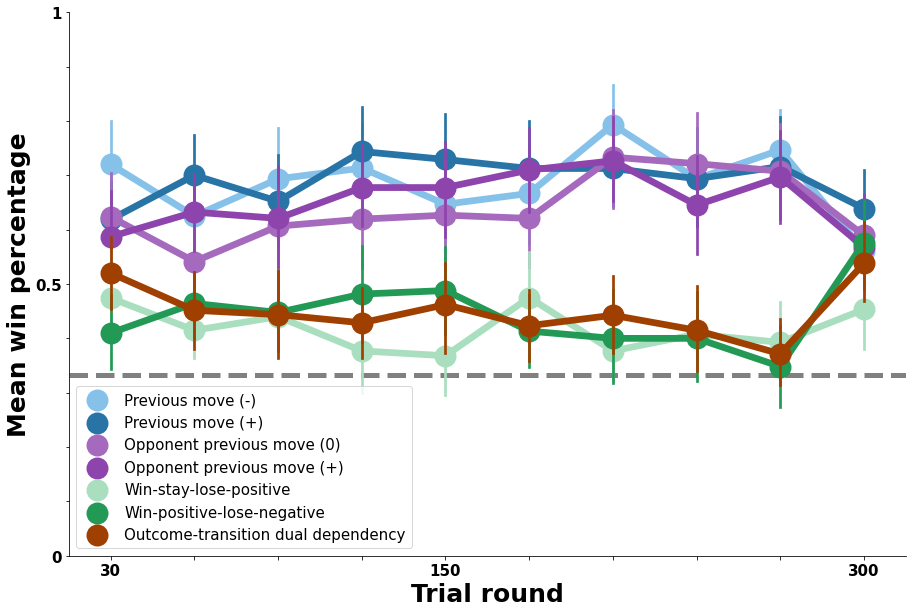

In [24]:
f_mix = groupby_f_data(df_result_mix, 'agent_outcome', bins=60)
f_mix = f_mix[f_mix['bin']<='50']
plot_win_rates(f_mix[f_mix['agent_outcome']=='win'], 'rl_mix')
#plot_win_rates(win_summary(groupby_f_data(df_result_mix,'agent_outcome',30),'agent_outcome'))